Taller Python

Diseño de experimentos :Wilson Samuel Mateus y Juan Sebastian Herrera


Computación Estistica: Santiago Colorado y Juan Sebastian Herrera

In [ ]:
!pip install basemap
#!pip install Pingouin

     |████████████████████████████████| 862 kB 15.0 MB/s 
     |████████████████████████████████| 219 kB 46.1 MB/s 
     |████████████████████████████████| 6.3 MB 36.5 MB/s 
     |████████████████████████████████| 30.5 MB 43.3 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=4bd9459e5dde2b49b2b53350480f3321cbbeabd2f3f17fdd9a4ee03bdda6f9f6
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [ ]:
from mpl_toolkits.mplot3d import Axes3D # Otra forma de importar librerías y funciones propias
from sklearn import datasets # Base de datos
from sklearn.linear_model import LinearRegression # Función de regresión lineal
from sklearn.model_selection import train_test_split # Se construye el modelo con un 70-80% de los datos
from sklearn.metrics import mean_squared_error # Estimador vs lo estimado
from numpy import random
from numpy.ma.core import append
from sklearn.utils.extmath import density
from numpy import std
from numpy.lib.function_base import mean
from numpy.lib.function_base import median
from pandas import DataFrame
from sklearn import datasets, linear_model

from mpl_toolkits.basemap.test import Basemap

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import pingouin as pg
import random as rd
import scipy as sc
import folium
import statistics as stat

In [ ]:
from numpy.ma.core import append

#Punto 1
np.random.seed(1000271731)

SeqLat = np.arange(start =-73.30, stop =-73.2499, step =0.001)
SeqLat
SeqLong = np.arange(start = 5.54, stop = 5.58, step =0.001)
SeqLong
Latitud = pd.DataFrame.sample(pd.DataFrame(SeqLat), 100, replace = True)
Latitud = list(Latitud[0])
Longitud = pd.DataFrame.sample(pd.DataFrame(SeqLong), 100, replace = True)
Longitud = list(Longitud[0])

#DataFrame
xy = pd.DataFrame({"Long":Longitud, "Lat":Latitud})
xy

#DataFrame 2
SMI = np.partition(np.random.uniform(0.7, 0.95, 100), 10)
NDVI = np.partition(np.random.uniform(0.45, 0.06, 100),10)
LST = np.partition(26*sc.stats.beta.rvs(0.87, 0.91, size = 100),10)

df = pd.DataFrame({"Long":Longitud,"Lat":Latitud, "SMI":SMI, "NDVI":NDVI, "LST":LST})
print(df)

# Graficar Long y Lat

x = df['Lat']
y = df['Long']

#Punto 3

sizes = df['SMI']*100

#Punto 4
colors = df['NDVI']

     Long     Lat       SMI      NDVI        LST
0   5.577 -73.255  0.709014  0.069397   0.059224
1   5.571 -73.291  0.707218  0.083125   0.010854
2   5.570 -73.299  0.710608  0.081787   1.493475
3   5.557 -73.254  0.707735  0.067621   1.251087
4   5.543 -73.265  0.701992  0.086993   0.609365
..    ...     ...       ...       ...        ...
95  5.556 -73.298  0.878526  0.312524  20.697133
96  5.543 -73.268  0.947079  0.258753  19.422083
97  5.548 -73.260  0.941959  0.326280  24.551004
98  5.567 -73.298  0.932959  0.407332  23.308859
99  5.579 -73.293  0.943229  0.354842  18.345219

[100 rows x 5 columns]


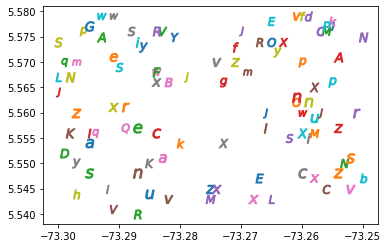

In [ ]:
#Punto 5

chars = "ABCDEFGHIJKLMNOPQRSTUVWXXYZabcdefghijklmnopqrstuvwxyz"
form = []

for j in range(100):
  form.append('$'+rd.choice(chars)+'$')
for i in range(len(x)):
  plt.scatter(x[i], y[i], s=sizes[i], marker= form[i])
plt.show()


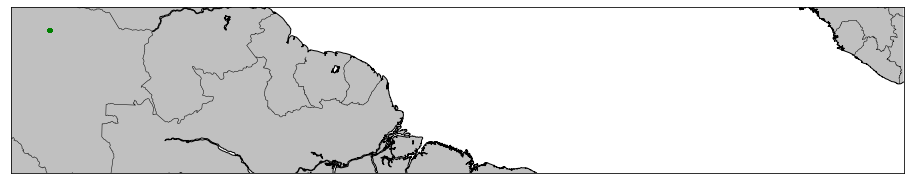

In [ ]:
#Punto 6
from typing import Sequence
plt.figure(figsize=(16,12))
my_map=Basemap(llcrnrlon=-75.,llcrnrlat=-2,urcrnrlon=-7.,urcrnrlat=11.,
             resolution='i', projection='tmerc', lat_0 = 85.5, lon_0 = -20.25)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='silver')

for i in range(100):
  x,y=my_map(Latitud[i],Longitud[i])
  my_map.plot(x, y,color="g", marker="o",markersize="3")



In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection = 'omerc', height = 16700000, width = 12000000, area_thresh = 1000., lon_0 = -100, lat_0 = 15, lon_1 = -50, lat_1 = -55, lon_2 = -120, lat_2 = 65, resolution = 'l')

map.drawmapboundary(fill_color='aqua')
#Fill the continents with the land color
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()
plt.show()

AttributeError: ignored

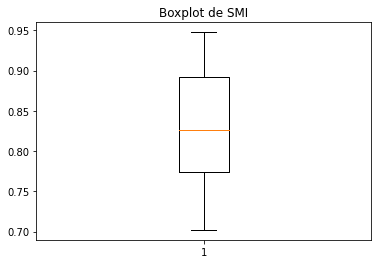

In [ ]:
#Punto 7
SMI = df["SMI"]
SMI
plt.boxplot(SMI)
plt.title("Boxplot de SMI")
plt.show()

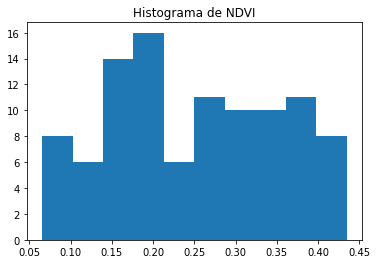

In [ ]:
#Punto 8
NDVI = df["NDVI"]
NDVI
plt.hist(NDVI)
plt.title("Histograma de NDVI")
plt.show()

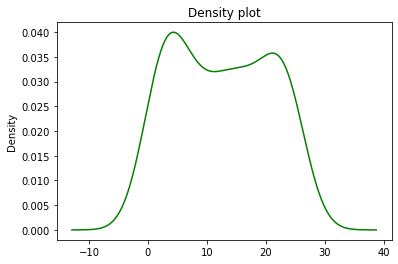

In [ ]:
#Punto 9
LST = df["LST"]
LST
LST.plot.density(color='green') 
plt.title('Density plot') 
plt.show()

In [ ]:
#Punto 10
from pandas.core.algorithms import mode
from numpy.lib.function_base import median

Media = np.mean(df["LST"])
print(Media)

Mediana = median(df["LST"])
print(Mediana)

sd = std(LST)
print(sd)

Rango = (min(df["LST"]), max(df["LST"]))
print(Rango)

Minimo = min(df["LST"])
Maximo = max(df["LST"])

Tabla_LST = pd.DataFrame({"Media":Media, "Mediana": Mediana, "Desviacion": sd, "Rango": Rango})
Tabla_LST

12.537830898445497
12.647912125503378
8.096222222472312
(0.010854203117415735, 25.81960635587581)


,Media,Mediana,Desviacion,Rango
0,12.537831,12.647912,8.096222,0.010854
1,12.537831,12.647912,8.096222,25.819606


In [ ]:
Media = np.mean(df["NDVI"])
print(Media)

Mediana = median(df["NDVI"])
print(Mediana)

sd = std(NDVI)
print(sd)

Rango = (min(df["NDVI"]), max(df["NDVI"]))
print(Rango)

Minimo = min(df["NDVI"])
Maximo = max(df["NDVI"])

Tabla_NDVI = pd.DataFrame({"Media":Media, "Mediana": Mediana, "Desviacion": sd, "Rango": Rango})
Tabla_NDVI

0.2495327956300419
0.24981519885772896
0.1033304977825249
(0.06558469792453708, 0.43446852245195117)


,Media,Mediana,Desviacion,Rango
0,0.249533,0.249815,0.10333,0.065585
1,0.249533,0.249815,0.10333,0.434469


In [ ]:
Media = np.mean(df["SMI"])
print(Media)

Mediana = median(df["SMI"])
print(Mediana)

sd = std(SMI)
print(sd)

Rango = (min(df["SMI"]), max(df["SMI"]))
print(Rango)

Minimo = min(df["SMI"])
Maximo = max(df["SMI"])

Tabla_SMI = pd.DataFrame({"Media":Media, "Mediana": Mediana, "Desviacion": sd, "Rango": Rango})
Tabla_SMI

0.8264525184197563
0.8263868842368373
0.0728886696531025
(0.7019919053540002, 0.9476553351468666)


,Media,Mediana,Desviacion,Rango
0,0.826453,0.826387,0.072889,0.701992
1,0.826453,0.826387,0.072889,0.947655


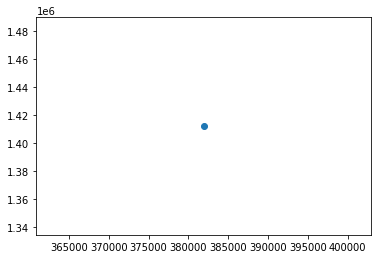

,Cuadrante,Latitud,Longitud,SMI,NDVI,LST
0,IV,-73.255,5.577,0.709014,0.069397,0.059224
1,II,-73.291,5.571,0.707218,0.083125,0.010854
2,II,-73.299,5.570,0.710608,0.081787,1.493475
3,I,-73.254,5.557,0.707735,0.067621,1.251087
4,I,-73.265,5.543,0.701992,0.086993,0.609365
...,...,...,...,...,...,...
95,III,-73.298,5.556,0.878526,0.312524,20.697133
96,I,-73.268,5.543,0.947079,0.258753,19.422083
97,I,-73.260,5.548,0.941959,0.326280,24.551004
98,II,-73.298,5.567,0.932959,0.407332,23.308859


In [ ]:
#punto 11

Latmean = np.mean(df["Lat"])
Longmean = np.mean(df["Long"])

Cuadrante = []

for i in range(len(df["Long"])):
    if df["Long"][i] < Longmean and df['Lat'][i] < Latmean:
      Cuadrante.append("III")
    elif df["Long"][i] > Longmean and df['Lat'][i] < Latmean:
      Cuadrante.append("II")
    elif df["Long"][i] < Longmean and df['Lat'][i] > Latmean:
      Cuadrante.append("I")
    elif df["Long"][i] > Longmean and df['Lat'][i] > Latmean:
      Cuadrante.append("IV")
    else:
        break

df2= pd.DataFrame({"Cuadrante": Cuadrante, "Latitud":Latitud, "Longitud": Longitud, "SMI":SMI, "NDVI":NDVI, "LST":LST})
df2
color = df2["Cuadrante"]
plt.scatter(x, y)#, c=color)
plt.show()

df2

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


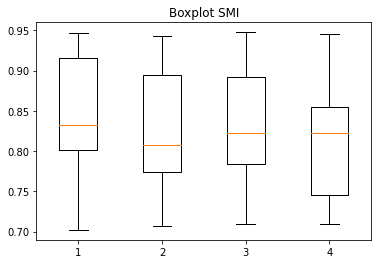

In [ ]:
#Punto 12
bp_i = (df2.loc[df2["Cuadrante"]=="I"])
bp_ii = (df2.loc[df2["Cuadrante"]=="II"])
bp_iii = (df2.loc[df2["Cuadrante"]=="III"])
bp_iv = (df2.loc[df2["Cuadrante"]=="IV"])

datos_smi=[bp_i["SMI"],bp_ii["SMI"],bp_iii["SMI"],bp_iv["SMI"]]
plt.boxplot(datos_smi)
plt.title("Boxplot SMI")
plt.show()

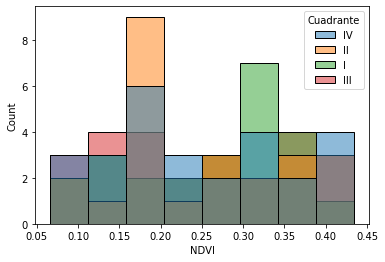

In [ ]:
#Punto 13
sns.histplot(x = df2['NDVI'], hue = df2['Cuadrante'])

Text(0.5, 0, 'LST')

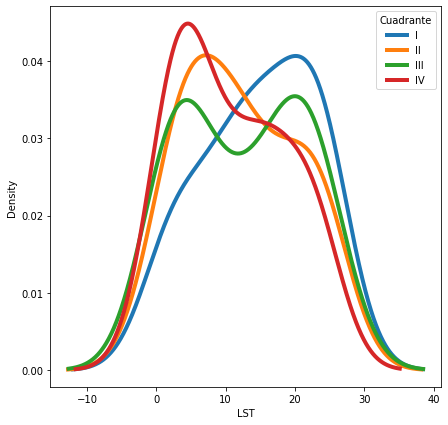

In [ ]:
#Punto 14
datos_lst = df2.pivot(columns='Cuadrante', 
                     values='LST')
datos_lst.plot.density(figsize = (7, 7), 
                       linewidth = 4) 
plt.xlabel("LST")

In [ ]:
#Punto 15
mployees_df = pd.DataFrame({'Latitud': Latitud,
    'Longitud':Longitud,
    'SMI': SMI,
    'NDVI':NDVI,
    'LST': LST})

corr_df = mployees_df.corr(method='pearson')
corr_df

,Latitud,Longitud,SMI,NDVI,LST
Latitud,1.000000,0.013254,0.025877,0.050022,0.046943
Longitud,0.013254,1.000000,-0.077216,-0.062224,-0.087856
SMI,0.025877,-0.077216,1.000000,0.851539,0.726595
NDVI,0.050022,-0.062224,0.851539,1.000000,0.573803
LST,0.046943,-0.087856,0.726595,0.573803,1.000000


           Latitud  Longitud       SMI      NDVI       LST
Latitud   1.000000  0.013254  0.025877  0.050022  0.046943
Longitud  0.013254  1.000000 -0.077216 -0.062224 -0.087856
SMI       0.025877 -0.077216  1.000000  0.851539  0.726595
NDVI      0.050022 -0.062224  0.851539  1.000000  0.573803
LST       0.046943 -0.087856  0.726595  0.573803  1.000000


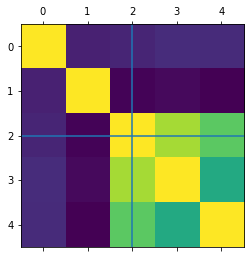

,Latitud,Longitud,SMI,NDVI,LST
Latitud,1.000000,0.013254,0.025877,0.050022,0.046943
Longitud,0.013254,1.000000,-0.077216,-0.062224,-0.087856
SMI,0.025877,-0.077216,1.000000,0.851539,0.726595
NDVI,0.050022,-0.062224,0.851539,1.000000,0.573803
LST,0.046943,-0.087856,0.726595,0.573803,1.000000


In [ ]:
#Punto 16
mployees_df = pd.DataFrame({'Latitud': Latitud,
    'Longitud':Longitud,
    'SMI': SMI,
    'NDVI':NDVI,
    'LST': LST})

corr_df = mployees_df.corr(method='pearson')
print(corr_df)
plt.matshow(corr_df)
plt.axvline(x=2)
plt.axhline(y=2)
plt.show()

corr_df.iloc[:,0:5]

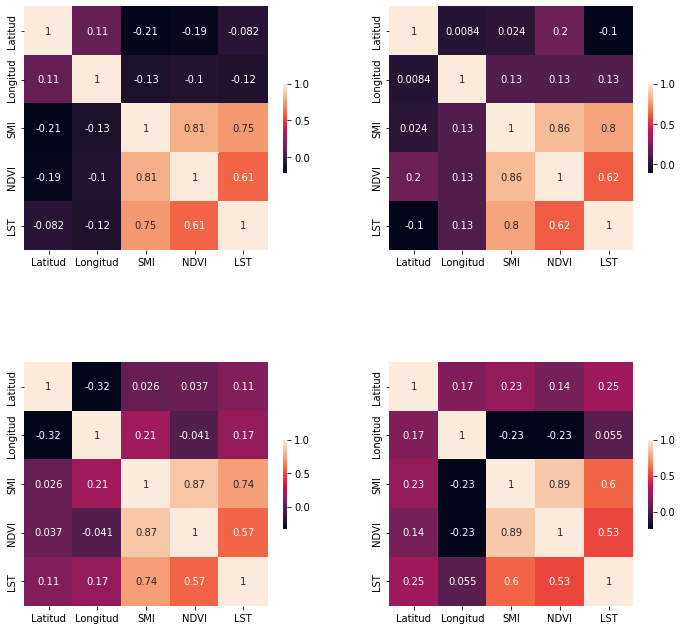

In [ ]:
from matplotlib import axes
#Punto 17

df3 = df2.loc[df2["Cuadrante"]== "I"]
Matrix_2 = df3.corr()
df4 = df2.loc[df2["Cuadrante"]== "II"]
Matrix_3 = df4.corr()
df5 = df2.loc[df2["Cuadrante"]== "III"]
Matrix_4 = df5.corr()
df6 = df2.loc[df2["Cuadrante"]== "IV"]
Matrix_5 = df6.corr()

fig = plt.figure(figsize= (12,12)) #largo x altura
ax1 = fig.add_subplot(2,2,1) #fila, columna, posición
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.heatmap(Matrix_2, annot= True, ax = ax1, square= True, cbar_kws={"shrink": .3})
sns.heatmap(Matrix_3, annot= True, ax = ax2, square= True, cbar_kws={"shrink": .3})
sns.heatmap(Matrix_4, annot= True, ax = ax3, square= True, cbar_kws={"shrink": .3})
sns.heatmap(Matrix_5, annot= True, ax = ax4, square= True, cbar_kws={"shrink": .3})

In [ ]:
#Punto 18 
X1 = np.array ([df["NDVI"]])
X1 = X1.reshape((-1,1))
Y1 = df["LST"]

smodel = LinearRegression().fit (X1, Y1)
print(f'R² = {smodel.score(X1, Y1)}')

R² = 0.32925025702445276


In [ ]:
#Punto 19

X2 = []
y1 = df["NDVI"]

for i in range(100):
  X2.append([df["LST"][i], df["SMI"][i]])

x,y = np.array(X2), np.array(y1)
model_multiple = LinearRegression().fit(x,y)
print(f" R2 = {model_multiple.score(x,y)}")



 R2 = 0.7293934882882976


           Latitud  Longitud       SMI      NDVI       LST
Latitud   1.000000 -0.112901 -0.118894 -0.250352 -0.089848
Longitud -0.112901  1.000000  0.141525 -0.015215 -0.017900
SMI      -0.118894  0.141525  1.000000  0.892929  0.642619
NDVI     -0.250352 -0.015215  0.892929  1.000000  0.504011
LST      -0.089848 -0.017900  0.642619  0.504011  1.000000
           Latitud  Longitud       SMI      NDVI       LST
Latitud   1.000000  0.067785  0.193494  0.367619 -0.053584
Longitud  0.067785  1.000000  0.059075  0.140255  0.206134
SMI       0.193494  0.059075  1.000000  0.887722  0.739568
NDVI      0.367619  0.140255  0.887722  1.000000  0.588393
LST      -0.053584  0.206134  0.739568  0.588393  1.000000
           Latitud  Longitud       SMI      NDVI       LST
Latitud   1.000000 -0.227108 -0.062130 -0.086014  0.183613
Longitud -0.227108  1.000000  0.119280 -0.219431  0.133763
SMI      -0.062130  0.119280  1.000000  0.858720  0.551931
NDVI     -0.086014 -0.219431  0.858720  1.000000  0.4325

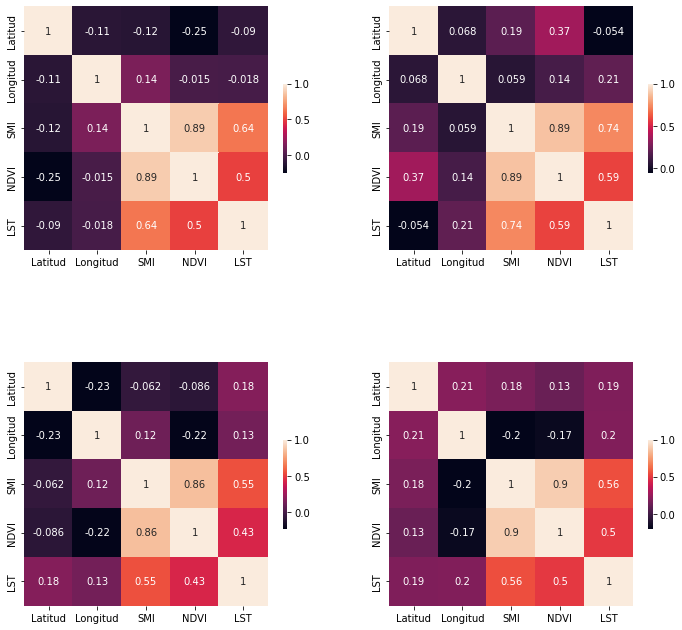

In [ ]:
#Punto 20
df7 = df2.iloc[:80,:]
df7

df3 = df7.loc[df7["Cuadrante"]== "I"]
Matrix_2 = df3.corr()
print(Matrix_2)
df4 = df7.loc[df7["Cuadrante"]== "II"]
Matrix_3 = df4.corr()
print(Matrix_3)
df5 = df7.loc[df7["Cuadrante"]== "III"]
Matrix_4 = df5.corr()
print(Matrix_4)
df6 = df7.loc[df7["Cuadrante"]== "IV"]
Matrix_5 = df6.corr()
print(Matrix_5)

fig = plt.figure(figsize= (12,12)) #largo x altura
ax1 = fig.add_subplot(2,2,1) #fila, columna, posición
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.heatmap(Matrix_2, annot= True, ax = ax1, square= True, cbar_kws={"shrink": .3})
sns.heatmap(Matrix_3, annot= True, ax = ax2, square= True, cbar_kws={"shrink": .3})
sns.heatmap(Matrix_4, annot= True, ax = ax3, square= True, cbar_kws={"shrink": .3})
sns.heatmap(Matrix_5, annot= True, ax = ax4, square= True, cbar_kws={"shrink": .3})


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     130.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           2.94e-28
Time:                        20:08:14   Log-Likelihood:                 150.44
No. Observations:                 100   AIC:                            -294.9
Df Residuals:                      97   BIC:                            -287.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8139      0.082     -9.956      0.0

0.002978677959065549

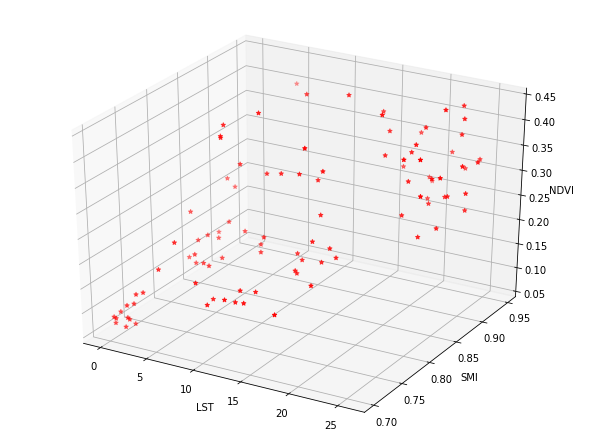

In [ ]:
#Punto 21
import pandas as pd  ## Este proporciona una estructura similiar a los data.frame
import statsmodels.api as sm  ## Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf 
from matplotlib import pyplot             # Permite la generación de gráficos
from mpl_toolkits.mplot3d import Axes3D   # Permite agregar eje tridimensionales
import random 


fig = pyplot.figure(figsize=(8, 6))       # Ajustes del gráfico
ax = Axes3D(fig)

x1 = df2["LST"]                             # Datos eje X
x2 = df2["SMI"]                             # Datos eje Y
y = df2["NDVI"]                              # Datos eje Z (Var. Respuesta)

ax.scatter(x1, x2, y, marker='*', c='r')
ax.set_xlabel('LST')        # Etiqueta del eje X
ax.set_ylabel('SMI')       # Etiqueta del eje Y
ax.set_zlabel('NDVI'); 
mod = smf.ols('y ~ x1 + x2', data=df2).fit()

print(mod.summary())
mod.params
mod.mse_resid

In [ ]:
#Punto 22


In [ ]:
#Punto 23


In [ ]:
#Punto 24


In [ ]:
#Punto 25


In [ ]:
#Punto 26


In [ ]:
#Punto 27


In [ ]:
#Punto 28


In [ ]:
#Punto 29


In [ ]:
#Punto 30